In [2]:
## Import des modules

import numpy as np 
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from tqdm import tqdm #foncton qui permet de mettre une barre d'avancement 

# Donne le chemin actuel
path = os.getcwd() 

# Liste tous les fichiers et dossiers du path + '/KinectDataGreenhouse'
os.listdir('KinectDataGreenhouse') 

['Box1_Temoin.csv',
 'allplots.png',
 'Box3_stress_salin.csv',
 'Box4_Temoin.csv',
 'Box2_Stress_hydrique.csv',
 'Box1_Temoin_cropAll.tif',
 'Box2_Stress_hydrique_CroppedAll.tif',
 'Box3_stress_salin_cropedAll.tif',
 'Box4_Temoin_croppedAll.tif']

In [3]:
path_Box1 = 'KinectDataGreenhouse/Box1_Temoin.csv' 
path_Box2 = 'KinectDataGreenhouse/Box2_Stress_hydrique.csv'
path_Box3 = 'KinectDataGreenhouse/Box3_stress_salin.csv'
path_Box4 = 'KinectDataGreenhouse/Box4_Temoin.csv'

## Chargement des data_frame
data1 = pd.read_csv(path_Box1)
data2 = pd.read_csv(path_Box2)
data3 = pd.read_csv(path_Box3)
data4 = pd.read_csv(path_Box4)

## Création du dataframe de travail
data = data1 

# Utilisez la méthode rename pour changer le nom de la colonne
data.rename(columns={'Y': 'Y1'}, inplace=True)

# Ajouter des nouvelles colonnes passées au log
epsilon = 10**(-6)
#data['Y1']= np.log(data['Y1'] +epsilon)
data['Y2']= data2['Y'] #np.log(data2['Y'] +epsilon)
data['Y3']= data3['Y'] #np.log(data3['Y'] +epsilon)
data['Y4']= data4['Y'] #np.log(data4['Y']+epsilon)

data

,X,Y1,Y2,Y3,Y4
0,1,33.7466,34.5046,29.39649,32.8649
1,2,33.9566,34.4659,29.37865,32.7770
2,3,33.8626,34.5336,29.39832,32.8522
3,4,33.8590,34.4877,29.36624,32.8359
4,5,33.8908,34.4924,29.34876,32.8129
...,...,...,...,...,...
1234,1235,14.2989,21.4865,25.29238,18.2839
1235,1236,14.2970,21.4836,25.30753,18.1708
1236,1237,14.3038,21.4350,25.34294,18.1334
1237,1238,14.4156,21.3993,25.33938,18.1660


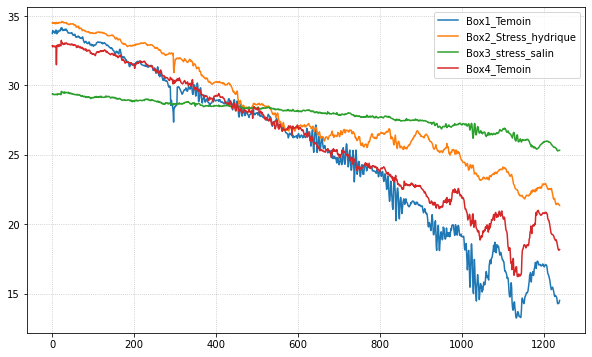

In [4]:

data[['Y1','Y2','Y3','Y4']].plot(figsize=(10, 6))

# Personnaliser la grille pour des espacements plus petits sur les axes x et y
plt.grid(True, which='both', axis='both', linestyle=':', color='gray', alpha=0.5)

# Ajouter une légende
plt.legend(['Box1_Temoin', 'Box2_Stress_hydrique', 'Box3_stress_salin', 'Box4_Temoin'])

# Afficher le graphique
plt.show()

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.62it/s]


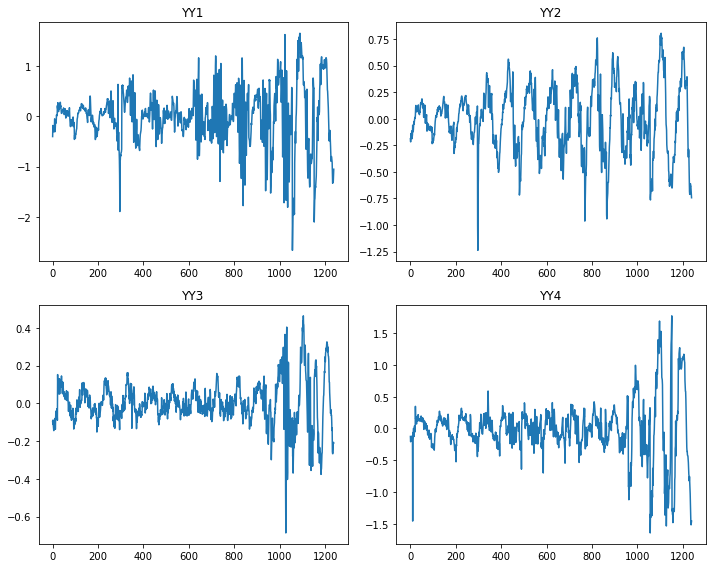

In [66]:
nb_jour=len(data)//96 # En effet len(data)%96 == 87 < 96
dico_Gr = {'Gr_1':[],'Gr_2':[],'Gr_3':[],'Gr_4':[]}

for j in tqdm(range(1,5)): #boucle sur les 4 features
    data[f'YY{j}'] = data[f'Y{j}']
    for i in range(nb_jour+1): #boucle sur les jours
        if i != nb_jour: #test pour le 13 ème jour pas entier 
            X_i = data.loc[range(i*96,(i+1)*96),'X'].values.reshape(-1, 1) #section sur le jour pour les temps
            Y_i = data.loc[range(i*96,(i+1)*96),f'Y{j}'].values.reshape(-1, 1) #section sur le jour pour la feature {j}
            model = LinearRegression() #créer un model de régression avec sklear.linear_model
            model.fit(X_i,Y_i) # entrainement du model sur le jour voulu et pour la feature 
            Y_i_pred = model.predict(X_i) # estimation du modèle
            data.loc[range(i*96,(i+1)*96),f'YY{j}'] = data.loc[range(i*96,(i+1)*96),f'Y{j}'] - Y_i_pred.ravel()
            dico_Gr[f'Gr_{j}'].append(model.coef_)
        else:
            X_i = data.loc[range(i*96,len(data)),'X'].values.reshape(-1, 1)
            Y_i = data.loc[range(i*96,len(data)),f'Y{j}'].values.reshape(-1, 1)
            model = LinearRegression()
            model.fit(X_i,Y_i)
            Y_i_pred = model.predict(X_i)
            data.loc[range(i*96,len(data)),f'YY{j}'] = data.loc[range(i*96,len(data)),f'Y{j}'] - Y_i_pred.ravel()

            
# Créez une figure avec 4 sous-graphiques arrangés en 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Utilisez une boucle for pour tracer chaque colonne 'YY{j}' dans un sous-graphique
for j in range(1, 5):
    row = (j - 1) // 2  # Calcul de la ligne (0 ou 1)
    col = (j - 1) % 2   # Calcul de la colonne (0 ou 1)
    
    # Tracer la colonne 'YY{j}' dans le sous-graphique correspondant
    data[f'YY{j}'].plot(ax=axes[row, col])
    
    # Ajoutez un titre au sous-graphique
    axes[row, col].set_title(f'YY{j}')

# Ajustez la disposition pour éviter les chevauchements
plt.tight_layout()

# Affichez la figure avec les sous-graphiques
plt.show()

<AxesSubplot:>

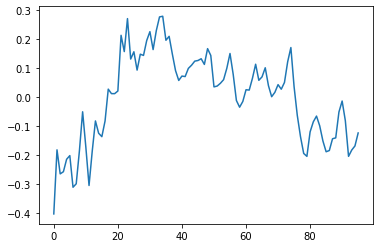

In [73]:
# Plot de 'YY1' sur la première journée
i=0
data.loc[range(i*96,(i+1)*96),'YY1'].plot() 

In [74]:
## Fonction integrale à l'aide de la méthode des trapèzes

def Int_trapeze(a,b,u): #On suppose que u est défini entre [a,b] avec u[0]=f(a) et u[-1]=f(b)
    u = np.array(u)
    S = 0
    N = len(u) # nombre de points du sample
    dt = (b-a)/(N-1) # (N-1) est le nombre d'écarts et dt et le pas
    for i in range(N-1):
        if u[i]*u[i+1] >= 0: 
            h = min(u[i],u[i+1])
            H = max(u[i],u[i+1])
            S += (h + (H-h)/2)*dt
        else:
            pass
    return S 


## Vérification sur une fonction simple

def f(x):
    return x**2

x = np.linspace(0,1,500)
y = f(x)

Int_trapeze(0,1,y)


            

0.33333400267468793

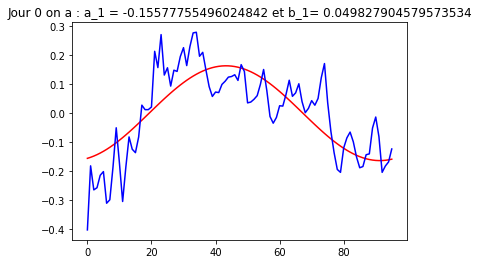

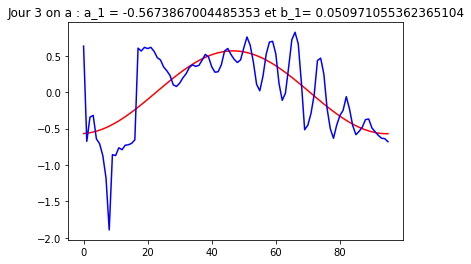

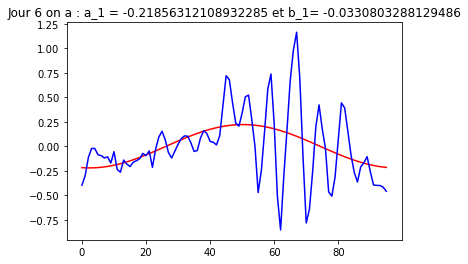

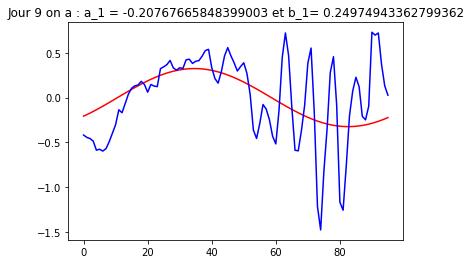

In [75]:
### ÉTUDE SUR YY1

T = 96 # 24*4

def c1(u):
    N=len(u)
    cos_1 = np.cos(np.linspace(0,T-1,N)*2*np.pi*1/T) #k=1 
    a_1 = 2/T * Int_trapeze(0,T-1,u*cos_1)
    sin_1 = np.sin(np.linspace(0,T-1,N)*2*np.pi/T)
    b_1 = 2/T *Int_trapeze(0,T-1,u*sin_1)
    return np.sqrt(a_1**2+b_1**2), a_1,b_1

def hdr(u):
    E = 1/T*Int_trapeze(0,T-1,u**2)
    return 100* np.sqrt(abs(E**2-1/2*c1(u)[0]**2)/(1/2*c1(u)[0]**2))


C1_1 = []
HDR_1 = []

for i in range(12):
    u = data.loc[range(i*96,(i+1)*96),'YY1']
    a_1,b_1 = c1(u)[1:]
    C1_1.append(c1(u)[0])
    HDR_1.append(hdr(u))
    
    
    if i%3 == 0:
        N=len(u)
        x = np.linspace(0,T-1,N)
        y = a_1*np.cos(2*np.pi*x/T) +b_1*np.sin(2*np.pi*x/T)
        plt.plot(x,y,c='r')
        plt.plot(x,np.array(data.loc[range(i*96,(i+1)*96),'YY1']),c='b')
        plt.title(f'Jour {i} on a : a_1 = {a_1} et b_1= {b_1}')
        plt.show()


In [95]:
dico_hdr = {'HDR_1':[],'HDR_2':[],'HDR_3':[],'HDR_4':[]}
dico_c1 = {'C1_1':[],'C1_2':[],'C1_3':[],'C1_4':[]}
dico_PT = {} #{f'PT_{i}':[] for i in range(1,5)}


for j in range(1,5):
    for i in range(12):
        u = data.loc[range(i*96,(i+1)*96),f'YY{j}']
        dico_c1[f'C1_{j}'].append(c1(u)[0])
        dico_hdr[f'HDR_{j}'].append(hdr(u)) 
    array_hdr = np.array(dico_hdr[f'HDR_{j}']).reshape((12,1))
    array_c1 = np.array(dico_c1[f'C1_{j}']).reshape((12,1))
    array_gr = np.array(dico_Gr[f'Gr_{j}']).reshape((12,1))
    #print(np.hstack((array_hdr,array_c1)))
    dico_PT[f'PT_{j}'] = np.hstack((array_hdr,array_c1,array_gr))

dico_PT.keys()

dict_keys(['PT_1', 'PT_2', 'PT_3', 'PT_4'])

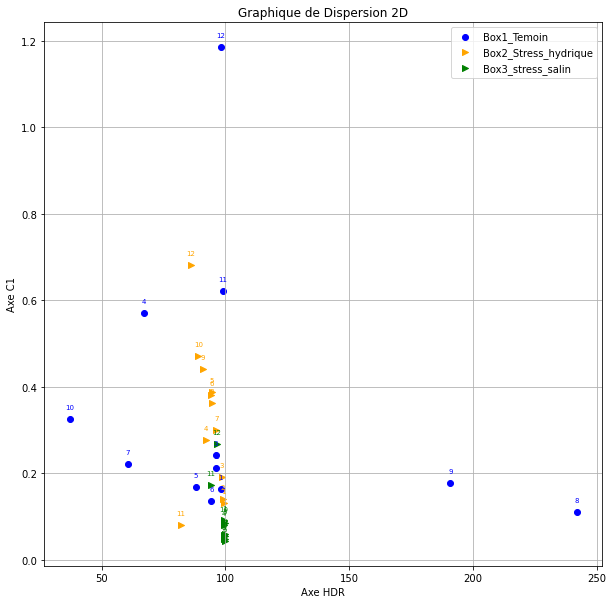

In [98]:

# Créez un graphique de dispersion en 2D
%matplotlib inline

indices = [f'{i}' for i in range(1,13)]

plt.figure(figsize=(10, 10))
plt.scatter(dico_PT[f'PT_1'][:,0], dico_PT[f'PT_1'][:,1], marker='o', c='b',label='Box1_Temoin')
for i, txt in enumerate(indices):
    plt.annotate(txt, (dico_PT[f'PT_1'][:,0][i], dico_PT[f'PT_1'][:,1][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=7, c='b')


plt.scatter(dico_PT[f'PT_2'][:,0], dico_PT[f'PT_2'][:,1], marker='>', c='orange',label='Box2_Stress_hydrique')
for i, txt in enumerate(indices):
    plt.annotate(txt, (dico_PT[f'PT_2'][:,0][i], dico_PT[f'PT_2'][:,1][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=7, c='orange')

plt.scatter(dico_PT[f'PT_3'][:,0], dico_PT[f'PT_3'][:,1], marker='>', c='g',label='Box3_stress_salin')
for i, txt in enumerate(indices):
    plt.annotate(txt, (dico_PT[f'PT_3'][:,0][i], dico_PT[f'PT_3'][:,1][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=7, c='g')

#plt.scatter(dico_PT[f'PT_3'][:,0], dico_PT[f'PT_3'][:,1], marker='>', c='g',label='Box3_stress_salin')
#plt.scatter(dico_PT[f'PT_4'][:,0], dico_PT[f'PT_4'][:,1], marker='s', c='r',label='Box4_Temoin')
plt.xlabel('Axe HDR')  # étiquette d'axe X
plt.ylabel('Axe C1')  # étiquette d'axe Y
plt.title('Graphique de Dispersion 2D')  
plt.legend()
plt.grid(True)

# Affichez le graphique
plt.show()





Using matplotlib backend: TkAgg


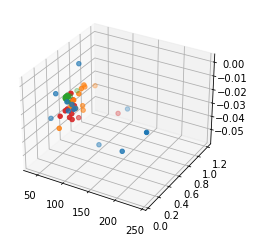

In [101]:
# Créez un graphique de dispersion en 3D
from mpl_toolkits.mplot3d import Axes3D
%matplotlib
%matplotlib inline

x1,y1,z1 = dico_PT[f'PT_1'][:,0], dico_PT[f'PT_1'][:,1], dico_PT[f'PT_1'][:,2]
x2,y2,z2 = dico_PT[f'PT_2'][:,0], dico_PT[f'PT_2'][:,1], dico_PT[f'PT_2'][:,2]
x3,y3,z3 = dico_PT[f'PT_3'][:,0], dico_PT[f'PT_3'][:,1], dico_PT[f'PT_3'][:,2]
x4,y4,z4 = dico_PT[f'PT_4'][:,0], dico_PT[f'PT_4'][:,1], dico_PT[f'PT_4'][:,2]

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',alpha=0.5)
ax.scatter(x1,y1,z1)
ax.scatter(x2,y2,z2)
ax.scatter(x3,y3,z3)
ax.scatter(x4,y4,z4)
#fig.ax()

plt.scatter(x1,y1,z1)

# Conclusion

Nos observations nous permettent de mettre en évidence un lien entre l'amplitude des mouvements des plantes observées et le stress de celles-ci. En effet, nous observons que les plantes qui subissent un stress (manque d'eau, sel...) ont des amplitudes de mouvements plus restreintes que celles qui n'ont pas de stress sur les douzes jours d'observation. Il serait bon cependant de refaire des nouvelles mesures sur des plantes qui ne subissent pas de stress et des plantes qui en subissent pour conforter cette thèse. 